Importing the libraries and packages

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Loading and Analysis

PIMA Diabetes Dataset

In [4]:
df = pd.read_csv("/content/diabetes.csv")

In [5]:
# printing the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset contains health-related information from women of Pima Indian heritage, aged 21 and older. The goal is to predict whether a person has diabetes based on these features.

Pregnancies:
The number of times a person has been pregnant. More pregnancies can sometimes be linked to a higher risk of diabetes due to factors like gestational diabetes.

Glucose:
The blood sugar level measured after a glucose tolerance test. High glucose levels are a key indicator of diabetes since they show how well the body handles sugar.

BloodPressure:
Diastolic blood pressure (the lower number in a BP reading), measured in mm Hg. High blood pressure is often seen alongside diabetes.

SkinThickness:
Measures the thickness of skin on the triceps (in mm), which helps estimate body fat. Higher skinfold thickness might suggest higher body fat, a risk factor for diabetes.

Insulin:
The amount of insulin in the blood after two hours (measured in mu U/mL). Abnormal insulin levels can indicate problems with how the body processes sugar, which is closely tied to diabetes.

BMI (Body Mass Index):
A measure of body fat based on height and weight: weight (kg) / height² (m²). Higher BMI often means more body fat, increasing the risk of type 2 diabetes.

Diabetes Pedigree Function:
A score that reflects the likelihood of diabetes based on family history. The higher the number, the stronger the genetic link to diabetes.

Age:
The patient’s age in years. The risk of developing diabetes tends to go up as people get older.

Outcome:
This is the target variable—basically the answer we’re trying to predict. A value of 1 means the person has diabetes, and 0 means they don’t.

In [6]:
# number of rows and columns
df.shape

(768, 9)

In [7]:
# some statistical measures of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 means Non-Diabetic

1 means Diabetic

In [9]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Preprocessing the Data

In [10]:
# separating the data into instances and there labels
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [11]:
print(X.shape, Y.shape)

(768, 8) (768,)


In [12]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization

We will need to scale the data at a particular range to help the model make better predictions

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X)

RobustScaler()

In [14]:
df_scaled = scaler.transform(X)

In [15]:
print(df_scaled)

[[ 0.6         0.75151515  0.         ...  0.17204301  0.66535948
   1.23529412]
 [-0.4        -0.77575758 -0.33333333 ... -0.58064516 -0.05620915
   0.11764706]
 [ 1.          1.6        -0.44444444 ... -0.93548387  0.78300654
   0.17647059]
 ...
 [ 0.4         0.0969697   0.         ... -0.62365591 -0.33333333
   0.05882353]
 [-0.4         0.21818182 -0.66666667 ... -0.20430108 -0.06143791
   1.05882353]
 [-0.4        -0.58181818 -0.11111111 ... -0.17204301 -0.1503268
  -0.35294118]]


Now all values are in range between 0 and 1

In [16]:
# copy this to X, Y is already done
X = df_scaled

In [17]:
print(X)
print(Y)

[[ 0.6         0.75151515  0.         ...  0.17204301  0.66535948
   1.23529412]
 [-0.4        -0.77575758 -0.33333333 ... -0.58064516 -0.05620915
   0.11764706]
 [ 1.          1.6        -0.44444444 ... -0.93548387  0.78300654
   0.17647059]
 ...
 [ 0.4         0.0969697   0.         ... -0.62365591 -0.33333333
   0.05882353]
 [-0.4         0.21818182 -0.66666667 ... -0.20430108 -0.06143791
   1.05882353]
 [-0.4        -0.58181818 -0.11111111 ... -0.17204301 -0.1503268
  -0.35294118]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Splitting

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Data Balancing using SMOTE (Synthetic Minority Over-sampling Technique)

-Since we saw that the data is unbalanced I will try SMOTE technique to try balancing the data and improve our results

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print(Y_train_smote.value_counts())

Outcome
1    400
0    400
Name: count, dtype: int64


Model Training

In [21]:
# We will include Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear'],
    'gamma': [0.001, 0.01, 0.1],
}

classifier = svm.SVC(probability = True, class_weight='balanced')

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_smote, Y_train_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score (Cross-Validation):", grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best Accuracy Score (Cross-Validation): 0.7474999999999999


Model Evaluation


In [22]:
# Accuracy Score on training data
train_pred = best_model.predict(X_train_smote)
train_accuracy = accuracy_score(train_pred, Y_train_smote)
print(f"Training Accuracy : {train_accuracy * 100:.2f}%")

Training Accuracy : 76.62%


In [23]:
# Accuracy Score on test data
test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(test_pred, Y_test)
print(f"Test Accuracy : {test_accuracy * 100:.2f}%")

Test Accuracy : 74.03%


In [24]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['Non-Diabetic', 'Diabetic']
classification_rep = classification_report(Y_test, test_pred, target_names=target_names)
print("Classification Report: \n", classification_rep)

Classification Report: 
               precision    recall  f1-score   support

Non-Diabetic       0.81      0.78      0.80       100
    Diabetic       0.62      0.67      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.74      0.74       154



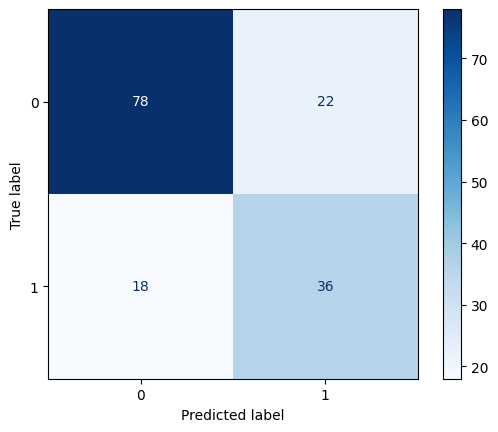

In [25]:
# creating a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, test_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
display.plot(cmap='Blues')

ROC Curve & AUC Analysis


In [26]:
y_probs = best_model.predict_proba(X_test)[:, 1]

In [27]:
# FPR = How often the model incorrectly identifies negatives as positives.
# TPR (Recall) = How well the model identifies actual positives.
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

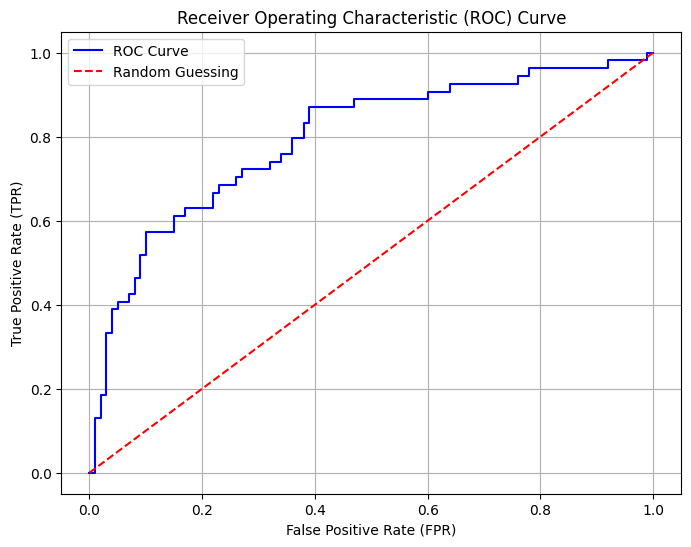

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')  # Diagonal line for comparison
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(Y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7946


Building a Predictive System

In [36]:
inputs_from_user = input("Enter your medical details as follows (separated by spaces):\n"
                    "1 - No. of Pregnancies\n"
                    "2 - Glucose level\n"
                    "3 - Blood Pressure\n"
                    "4 - Skin Thickness (in mm)\n"
                    "5 - Insulin level\n"
                    "6 - BMI (Body Mass Index)\n"
                    "7 - Diabetes Pedigree Function\n"
                    "8 - Age\n"
                    "Example: 2 120 70 20 85 32.5 0.5 30\n\n"
                    "Your input: ")

input_list = [float(i) for i in inputs_from_user.split()]

if len(input_list) != 8:
  print("Error: Please enter exactly 8 values.")

else:

# hardcoded inputs
#inputs = [(10,168,74,0,0,38,0.537,34),
#          (1,103,30,38,83,43.3,0.183,33)]

#for input in inputs:
  input_as_np = np.asarray(input_list)
  input_reshaped = input_as_np.reshape(1, -1)
  # because in the training we've scaled the data
  input_scaled = scaler.transform(input_reshaped)

  pred = best_model.predict(input_scaled)

  if(pred[0] == 0):
    print(f'The instance is {pred} so the person is Non-Diabetic')
  else:
    print(f'The instance is {pred} so the person is Diabetic')

  print()

Enter your medical details as follows (separated by spaces):
1 - No. of Pregnancies
2 - Glucose level
3 - Blood Pressure
4 - Skin Thickness (in mm)
5 - Insulin level
6 - BMI (Body Mass Index)
7 - Diabetes Pedigree Function
8 - Age
Example: 2 120 70 20 85 32.5 0.5 30

Your input: 0 88 60 20 54 22.5 0.142 22
The instance is [0] so the person is Non-Diabetic



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [37]:
import pickle

In [38]:
filename = 'trained_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [40]:
scaler_filename = 'scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))

In [39]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [41]:
# Loading the saved scaler
loaded_scaler = pickle.load(open('scaler.sav', 'rb'))

In [42]:
inputs_from_user = input("Enter your medical details as follows (separated by spaces):\n"
                    "1 - No. of Pregnancies\n"
                    "2 - Glucose level\n"
                    "3 - Blood Pressure\n"
                    "4 - Skin Thickness (in mm)\n"
                    "5 - Insulin level\n"
                    "6 - BMI (Body Mass Index)\n"
                    "7 - Diabetes Pedigree Function\n"
                    "8 - Age\n"
                    "Example: 2 120 70 20 85 32.5 0.5 30\n\n"
                    "Your input: ")

input_list = [float(i) for i in inputs_from_user.split()]

if len(input_list) != 8:
  print("Error: Please enter exactly 8 values.")

else:

# hardcoded inputs
#inputs = [(10,168,74,0,0,38,0.537,34),
#          (1,103,30,38,83,43.3,0.183,33)]

#for input in inputs:
  input_as_np = np.asarray(input_list)
  input_reshaped = input_as_np.reshape(1, -1)
  # because in the training we've scaled the data
  input_scaled = loaded_scaler.transform(input_reshaped)

  pred = loaded_model.predict(input_scaled)

  if(pred[0] == 0):
    print(f'The instance is {pred} so the person is Non-Diabetic')
  else:
    print(f'The instance is {pred} so the person is Diabetic')

  print()

Enter your medical details as follows (separated by spaces):
1 - No. of Pregnancies
2 - Glucose level
3 - Blood Pressure
4 - Skin Thickness (in mm)
5 - Insulin level
6 - BMI (Body Mass Index)
7 - Diabetes Pedigree Function
8 - Age
Example: 2 120 70 20 85 32.5 0.5 30

Your input: 0 88 60 20 54 22.5 0.142 22
The instance is [0] so the person is Non-Diabetic



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
